In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sns.set_style('white')
sns.set_context("poster")

In [2]:
data = pd.read_csv('dataset/data_with_tags.csv')

In [3]:
data

,Review,Polarity,Useful,ReviewLength,Nouns,Adjectives,Verbs
0,sister really enjoyed cartet april day nice wa...,1,0,486,35.0,15.0,14.0
1,watch pricing wanted buy item attempted charge...,-1,0,223,21.0,6.0,7.0
2,like sampling different teas checking new prod...,1,0,130,7.0,4.0,4.0
3,crispy chicken sandwich good considering going...,1,0,246,12.0,6.0,11.0
4,boyfriend one trip vegas annually pack shows e...,1,0,738,46.0,23.0,23.0
...,...,...,...,...,...,...,...
74992,disabled veteran service dog denied service to...,-1,1,87,7.0,2.0,3.0
74993,great service place clean job completed quickl...,1,0,63,3.0,2.0,2.0
74994,really star review no longer take clients rest...,-1,4,439,26.0,14.0,18.0
74995,say never say never japango say never ever tdl...,-1,10,2405,136.0,69.0,77.0


In [4]:
data.describe()

,Polarity,Useful,ReviewLength,Nouns,Adjectives,Verbs
count,74997.000000,74997.000000,74997.000000,74997.000000,74997.000000,74997.000000
mean,0.000027,1.534941,411.325133,25.845327,12.593464,13.467792
std,0.816502,9.585050,369.768736,23.528850,11.155268,13.479472
min,-1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,168.000000,11.000000,5.000000,5.000000
50%,0.000000,1.000000,299.000000,19.000000,9.000000,9.000000
75%,1.000000,2.000000,527.000000,33.000000,16.000000,18.000000
max,1.000000,2133.000000,4713.000000,504.000000,156.000000,153.000000


In [5]:
## Useful got some aweful outliers

data['Useful'].unique()

array([   0,    3,    1,   11,    2,   14,    8,    6,    4,    5,    9,
          7,   21,   17,   10,   19,   15,   13,   18,   42,   45,   20,
         64,   12,   16,   26,   24,   27,   32,   25,   37,   35,   22,
         43,   39,   46,  112,   65,   28,  194,   29,   23,   51,   44,
        200,   30,   33,   31,  463,   52,   56,   49,   61,   40,   47,
        319,   48,   50,   53,   34,   76,   36,   80,  133,   89,   58,
         38,   59,   54,   86,   67,   72,   62,   85, 2133,  782,   69,
         95,  775,   63], dtype=int64)

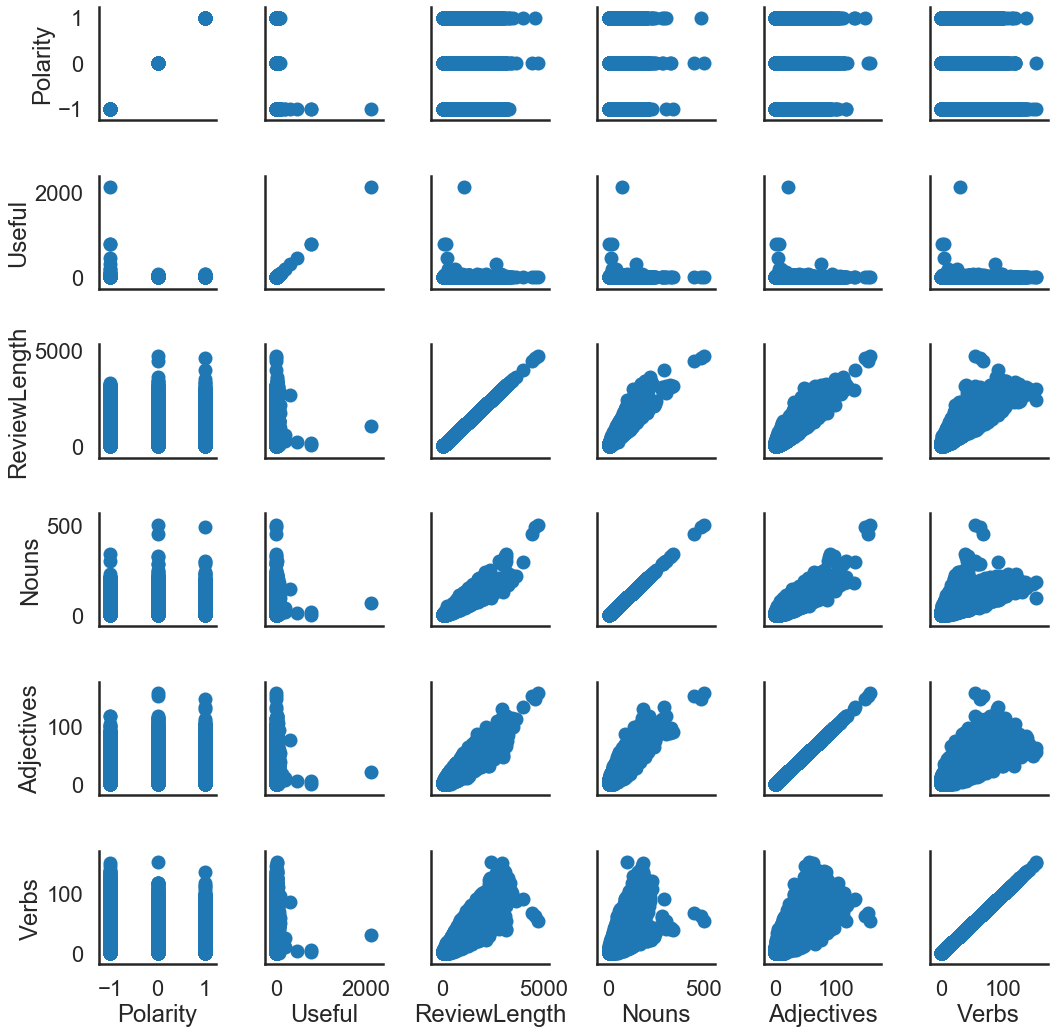

In [6]:
g = sns.PairGrid(data)
g.map(plt.scatter)

In [7]:
#Removing Useful outliers


top_99 = data["Useful"].quantile(0.99)
data = data[data["Useful"] < top_99]

In [8]:
data.describe()

,Polarity,Useful,ReviewLength,Nouns,Adjectives,Verbs
count,74129.000000,74129.000000,74129.000000,74129.000000,74129.000000,74129.000000
mean,0.003507,1.241134,405.913192,25.510596,12.457176,13.264701
std,0.815822,1.948626,362.087619,23.064759,10.973355,13.179041
min,-1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,167.000000,11.000000,5.000000,5.000000
50%,0.000000,0.000000,297.000000,19.000000,9.000000,9.000000
75%,1.000000,2.000000,520.000000,32.000000,16.000000,17.000000
max,1.000000,12.000000,4713.000000,504.000000,156.000000,153.000000


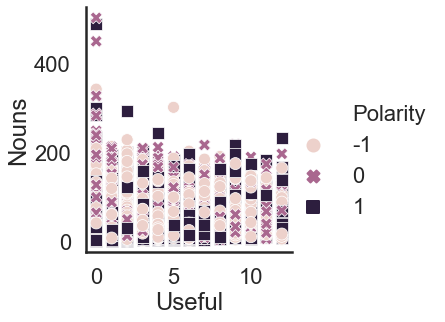

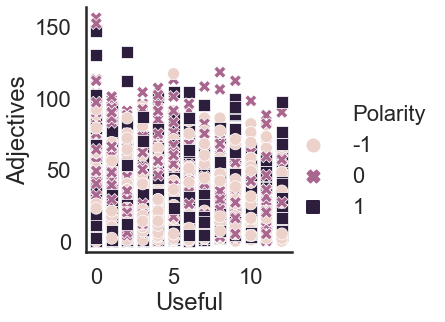

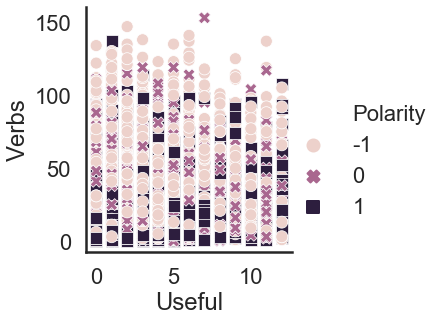

In [9]:
sns.relplot(x="Useful", y="Nouns", data=data, hue="Polarity", style="Polarity");
sns.relplot(x="Useful", y="Adjectives", data=data, hue="Polarity", style="Polarity");
sns.relplot(x="Useful", y="Verbs", data=data, hue="Polarity", style="Polarity");

In [10]:
# Dividing the usefulness:
'''
 * < 4 Low
 * >=4 and <8 Average
 * >= 8 High
''' 

def applyUsefulness(useful):
    if useful < 4:
        return 'low'
    if useful >= 4 and useful <8:
        return 'medium'
    if useful >= 8:
        return 'high'

In [11]:
UsefulnessColumn = data['Useful']
Usefulness = UsefulnessColumn.map(applyUsefulness)
data['UsefulnessPolarity'] = Usefulness 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
data['UsefulnessPolarity'].unique()

array(['low', 'high', 'medium'], dtype=object)

In [ ]:
sns.relplot(x="UsefulnessPolarity", y="Nouns", data=data, hue="Polarity", style="Polarity");
sns.relplot(x="UsefulnessPolarity", y="Adjectives", data=data, hue="Polarity", style="Polarity");
sns.relplot(x="UsefulnessPolarity", y="Verbs", data=data, hue="Polarity", style="Polarity");

### Models with only linguistic features

In [ ]:
data.head()

In [ ]:
data.corr()

In [ ]:
dataToConsider = data[['Polarity', 'ReviewLength', 'Nouns', 'Adjectives', 'Verbs', 'UsefulnessPolarity']]

In [ ]:
X = dataToConsider.drop('UsefulnessPolarity', axis = 1)
y = dataToConsider['UsefulnessPolarity']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 


### DecisionTreeClassifier

In [ ]:

dtree_model = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))

In [ ]:
conf_mat = confusion_matrix(y_test, dtree_predictions)
class_label = ["low", "medium", "high"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Random Forest Classifier

In [ ]:
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["low", "medium", "high"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Naive Bayes classifier 

In [ ]:
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print("Accuracy:",accuracy) 

In [ ]:
conf_mat = confusion_matrix(y_test, gnb_predictions)
class_label = ["low", "medium", "high"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### K Neighbors Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train) 
y_pred = knn.predict(X_test)
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy)

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["low", "medium", "high"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()